In [1]:
# Import the necessary packages and libraries #
import scipy
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy
import numpy.matlib
import pandas 
import sklearn
from sklearn import preprocessing
from sklearn import linear_model
import tensorflow
from tensorflow import keras 
import os
from sklearn.neighbors import DistanceMetric

In [2]:
# Sets the precision of the data in the Pandas Dataframes 

pandas.set_option("precision", 10)

In [3]:
# Removes any Tensorflow warnings 

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [4]:
# Import the MatLab data #

matlabData = sio.loadmat(file_name='./data/s2_sl2p_uniform_10_replicates_sobol_prosail_inout.mat', variable_names=['Input', 'Output'])

In [5]:
# Extract the input and output data #

bands = pandas.DataFrame(data=matlabData['Input']['Rho_Toc'][0][0])
angles = pandas.DataFrame(data=matlabData['Input']['Angles'][0][0])
LAI = pandas.Series(data=matlabData['Output']['LAI'][0][0].flatten())
FAPAR = pandas.Series(data=matlabData['Output']['FAPAR'][0][0].flatten())
FCOVER = pandas.Series(data=matlabData['Output']['FCOVER'][0][0].flatten())

In [6]:
# Standardize the calibration data #

cal_data = pandas.concat([bands, angles, LAI, FAPAR, FCOVER], axis=1, join='outer')

cal_data.columns = ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'A1', 'A2', 'A3', 'LAI', 'FAPAR', 'FCOVER']

cal_data

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER
0,0.1312746755,0.0743505601,0.1729546392,0.2952160738,0.3209243927,0.3303722287,0.1873586099,0.1113007554,0.9638065534,0.5275411500,-0.5752876765,1,0.4391203617,0.4803244610
1,0.1019407701,0.0868185076,0.1599851769,0.3680334831,0.4389734403,0.4759755142,0.3043390179,0.1996883219,0.9995852344,0.5284670738,-0.4777431279,1,0.5296906764,0.5338211214
2,0.0577228876,0.0543735427,0.0726863963,0.1146353863,0.1262129829,0.1300015294,0.1048168652,0.0853760008,0.9807097061,0.6843199822,0.6909005295,1,0.2406051357,0.2324486617
3,0.0608335819,0.0423475494,0.0917885392,0.1738484853,0.1980468499,0.2153382831,0.1396374825,0.0906137034,0.9865515976,0.7869673865,0.8590635747,1,0.3515168619,0.3732491055
4,0.0789422177,0.1359804109,0.1677317262,0.2554469658,0.2962514793,0.3108466204,0.3167107908,0.2088934617,0.9999190888,0.8237423248,-0.9085753290,1,0.2890892994,0.2565897729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122875,0.0642385315,0.0276301255,0.0866383370,0.3106952678,0.4255780128,0.4466691326,0.1173674161,0.0414608341,0.9641458993,0.8501574022,-0.9266152189,10,0.9454688738,0.9530549586
122876,0.0913131658,0.0504649365,0.1222839075,0.3081750760,0.4047671458,0.4293059492,0.1725548796,0.1005631041,0.9616583754,0.8710934328,0.9265827175,10,0.8085248415,0.8034524935
122877,0.0621419307,0.0380236717,0.0921177459,0.2614424931,0.3577263614,0.3626203975,0.1294881968,0.0624406803,0.9757927762,0.8637999983,-0.9813994186,10,0.8185069725,0.8122050332
122878,0.0514800307,0.0288523379,0.0690024543,0.4158467721,0.6343113015,0.6354447032,0.1810943898,0.0474550174,0.9606931097,0.8268533675,-0.8694016324,10,0.9810850825,0.9992241257


In [7]:
NVDI = (cal_data['B5']-cal_data['B3'])/(cal_data['B5']+cal_data['B3'])

cal_data['NVDI'] = NVDI

cal_data

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER,NVDI
0,0.1312746755,0.0743505601,0.1729546392,0.2952160738,0.3209243927,0.3303722287,0.1873586099,0.1113007554,0.9638065534,0.5275411500,-0.5752876765,1,0.4391203617,0.4803244610,0.0561969505
1,0.1019407701,0.0868185076,0.1599851769,0.3680334831,0.4389734403,0.4759755142,0.3043390179,0.1996883219,0.9995852344,0.5284670738,-0.4777431279,1,0.5296906764,0.5338211214,0.1278920384
2,0.0577228876,0.0543735427,0.0726863963,0.1146353863,0.1262129829,0.1300015294,0.1048168652,0.0853760008,0.9807097061,0.6843199822,0.6909005295,1,0.2406051357,0.2324486617,0.0628120376
3,0.0608335819,0.0423475494,0.0917885392,0.1738484853,0.1980468499,0.2153382831,0.1396374825,0.0906137034,0.9865515976,0.7869673865,0.8590635747,1,0.3515168619,0.3732491055,0.1066063936
4,0.0789422177,0.1359804109,0.1677317262,0.2554469658,0.2962514793,0.3108466204,0.3167107908,0.2088934617,0.9999190888,0.8237423248,-0.9085753290,1,0.2890892994,0.2565897729,0.0978285043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122875,0.0642385315,0.0276301255,0.0866383370,0.3106952678,0.4255780128,0.4466691326,0.1173674161,0.0414608341,0.9641458993,0.8501574022,-0.9266152189,10,0.9454688738,0.9530549586,0.1795355904
122876,0.0913131658,0.0504649365,0.1222839075,0.3081750760,0.4047671458,0.4293059492,0.1725548796,0.1005631041,0.9616583754,0.8710934328,0.9265827175,10,0.8085248415,0.8034524935,0.1642494776
122877,0.0621419307,0.0380236717,0.0921177459,0.2614424931,0.3577263614,0.3626203975,0.1294881968,0.0624406803,0.9757927762,0.8637999983,-0.9813994186,10,0.8185069725,0.8122050332,0.1621277372
122878,0.0514800307,0.0288523379,0.0690024543,0.4158467721,0.6343113015,0.6354447032,0.1810943898,0.0474550174,0.9606931097,0.8268533675,-0.8694016324,10,0.9810850825,0.9992241257,0.2088839645


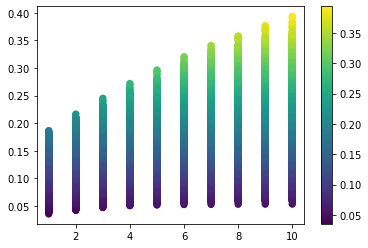

In [8]:
plt.scatter(cal_data['LAI'],cal_data['NVDI'],c=cal_data['NVDI'])
plt.colorbar(mappable=plt.scatter(cal_data['LAI'], cal_data['NVDI'], c = cal_data['NVDI']))

In [9]:
# Create subset id's #

rep = 10

subsets = numpy.arange(0, int(cal_data.shape[0]/10))

subset_ids = numpy.matlib.repmat(subsets, 1, rep)

cal_data['subset_id'] = subset_ids[0]

cal_data.columns = ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'A1', 'A2', 'A3', 'LAI', 'FAPAR', 'FCOVER', 'NVDI', 'subset_id']

cal_data

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER,NVDI,subset_id
0,0.1312746755,0.0743505601,0.1729546392,0.2952160738,0.3209243927,0.3303722287,0.1873586099,0.1113007554,0.9638065534,0.5275411500,-0.5752876765,1,0.4391203617,0.4803244610,0.0561969505,0
1,0.1019407701,0.0868185076,0.1599851769,0.3680334831,0.4389734403,0.4759755142,0.3043390179,0.1996883219,0.9995852344,0.5284670738,-0.4777431279,1,0.5296906764,0.5338211214,0.1278920384,1
2,0.0577228876,0.0543735427,0.0726863963,0.1146353863,0.1262129829,0.1300015294,0.1048168652,0.0853760008,0.9807097061,0.6843199822,0.6909005295,1,0.2406051357,0.2324486617,0.0628120376,2
3,0.0608335819,0.0423475494,0.0917885392,0.1738484853,0.1980468499,0.2153382831,0.1396374825,0.0906137034,0.9865515976,0.7869673865,0.8590635747,1,0.3515168619,0.3732491055,0.1066063936,3
4,0.0789422177,0.1359804109,0.1677317262,0.2554469658,0.2962514793,0.3108466204,0.3167107908,0.2088934617,0.9999190888,0.8237423248,-0.9085753290,1,0.2890892994,0.2565897729,0.0978285043,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122875,0.0642385315,0.0276301255,0.0866383370,0.3106952678,0.4255780128,0.4466691326,0.1173674161,0.0414608341,0.9641458993,0.8501574022,-0.9266152189,10,0.9454688738,0.9530549586,0.1795355904,12283
122876,0.0913131658,0.0504649365,0.1222839075,0.3081750760,0.4047671458,0.4293059492,0.1725548796,0.1005631041,0.9616583754,0.8710934328,0.9265827175,10,0.8085248415,0.8034524935,0.1642494776,12284
122877,0.0621419307,0.0380236717,0.0921177459,0.2614424931,0.3577263614,0.3626203975,0.1294881968,0.0624406803,0.9757927762,0.8637999983,-0.9813994186,10,0.8185069725,0.8122050332,0.1621277372,12285
122878,0.0514800307,0.0288523379,0.0690024543,0.4158467721,0.6343113015,0.6354447032,0.1810943898,0.0474550174,0.9606931097,0.8268533675,-0.8694016324,10,0.9810850825,0.9992241257,0.2088839645,12286


In [10]:
ref_data = pandas.DataFrame()

for i in range(1,11):
    test = cal_data[cal_data['LAI'] == i]
    sort_test = test.sort_values(by=['NVDI'])
    frac = round(0.2*(sort_test.shape[0]))
    lowest_values = sort_test.head(n=frac)
    samples = lowest_values.sample(n=20)
    ref_data = ref_data.append(samples)

In [11]:
ref_data

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER,NVDI,subset_id
222,0.1241008396,0.1255410010,0.1921339627,0.3243340055,0.3655388651,0.3768586576,0.3678721882,0.2997436749,0.9931327435,0.8451746820,0.9843478650,1,0.3853782686,0.3729023190,0.0749075894,222
1277,0.0728546875,0.0922930727,0.1182519982,0.1557176996,0.1716909045,0.1798004252,0.2239595753,0.2097057019,0.9980558014,0.6108741114,-0.5835349143,1,0.1907070338,0.1730942624,0.0717777188,1277
483,0.1031427212,0.0634301505,0.1412721974,0.3144271468,0.3559796920,0.3665643017,0.2457508597,0.1415087882,0.9993328695,0.7758781053,-0.7429827377,1,0.4941312467,0.5209908722,0.0765606602,483
1472,0.1271974345,0.0533058644,0.1604825330,0.2952767888,0.3186316279,0.3238934693,0.2385426435,0.1432391192,0.9706178378,0.8319850147,0.9614675458,1,0.4431412397,0.5071145812,0.0462177893,1472
5031,0.1314088615,0.1362327399,0.2338021255,0.3942316438,0.4362511298,0.4490353278,0.3889233893,0.2298498629,0.9999048808,0.8395114976,-0.9358360752,1,0.4290786973,0.4396168331,0.0649897196,5031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120059,0.1816273731,0.0460390009,0.2273325110,0.6340946647,0.7992667715,0.8149721318,0.3827832972,0.1844746752,0.9895416789,0.9100702372,0.9870922902,10,0.9464807248,0.9922637583,0.1248234157,9467
122066,0.0842586770,0.0276358614,0.1081316552,0.3503178906,0.4622960312,0.4578337371,0.1091431904,0.0393350607,0.9994541147,0.8511560291,-0.9494369229,10,0.9358673246,0.9465381316,0.1330392006,11474
112458,0.1292817273,0.0367245500,0.1741298460,0.5398372924,0.6769423025,0.7079658353,0.2673996343,0.0907805846,0.9572608462,0.8685231583,-0.8381479485,10,0.9610727604,0.9949990698,0.1347396389,1866
114777,0.1356923644,0.0373163487,0.1796514668,0.5015013772,0.6214641087,0.6529540898,0.1888652115,0.0576191198,0.9909028098,0.8274362461,0.9381713235,10,0.9575335549,0.9916904195,0.1311897400,4185


In [12]:
# List of indices to remove from the calibration database #

index_list = ref_data.index.values

In [13]:
# Removes the indices from calibration database that are in the reference database #

cal_data = cal_data.drop(index_list)

In [14]:
# Resets the indices in the reference data so that they start from zero   

ref_data = ref_data.reset_index(drop=True)

In [15]:
# Resets the indices in the calibration data so that they start from zero

cal_data = cal_data.reset_index(drop=True)

In [16]:
# Creates the training and validation sets from the calibration data

features_training, features_valid = sklearn.model_selection.train_test_split(cal_data, test_size=0.3, train_size=0.7, random_state=None, shuffle=True, stratify=None)

In [17]:
# Resets the indices in the training data so that they start from zero

features_training = features_training.reset_index(drop=True)

In [18]:
# Resets the indices in the validation data so that they start from zero

features_valid = features_valid.reset_index(drop=True)

In [19]:
# Extracts the LAI, FAPAR, and FCOVER data to be used for training

LAI_feature_training = features_training['LAI']
FAPAR_feature_training = features_training['FAPAR']
FCOVER_feature_training = features_training['FCOVER']

In [20]:
# Extracts the LAI, FAPAR, and FCOVER data to be used for validation

LAI_feature_valid = features_valid['LAI']
FAPAR_feature_valid = features_valid['FAPAR']
FCOVER_feature_valid = features_valid['FCOVER']

In [21]:
# Removes that isn't needed for training and validation 
features_training = features_training.drop(['LAI', 'FAPAR', 'FCOVER', 'subset_id'], axis=1)
features_valid = features_valid.drop(['LAI', 'FAPAR', 'FCOVER', 'subset_id'], axis=1)

In [22]:
# Creates a model for LAI, FAPAR, and FCOVER using LARs regression 

LAI_feature_model = sklearn.linear_model.Lars(n_nonzero_coefs=4)
LAI_feature_model = LAI_feature_model.fit(features_training, LAI_feature_training)

FAPAR_feature_model = sklearn.linear_model.Lars(n_nonzero_coefs=4)
FAPAR_feature_model = FAPAR_feature_model.fit(features_training, FAPAR_feature_training)

FCOVER_feature_model = sklearn.linear_model.Lars(n_nonzero_coefs=4)
FCOVER_feature_model = FCOVER_feature_model.fit(features_training, FCOVER_feature_training)

In [23]:
# Makes predictions on the validation data using the LARS models

LAI_feature_predicted = pandas.Series(LAI_feature_model.predict(features_valid))
FAPAR_feature_predicted = pandas.Series(FAPAR_feature_model.predict(features_valid))
FCOVER_feature_predicted = pandas.Series(FCOVER_feature_model.predict(features_valid))

In [24]:
# Extracts the features from the LARS Model

LAI_features = numpy.nonzero(LAI_feature_model.coef_)[0]
FAPAR_features = numpy.nonzero(FAPAR_feature_model.coef_)[0]
FCOVER_features = numpy.nonzero(FCOVER_feature_model.coef_)[0]

LAI_features = features_valid.columns[LAI_features]
print(LAI_features)
FAPAR_features = features_valid.columns[FAPAR_features]
print(FAPAR_features)
FCOVER_features = features_valid.columns[FCOVER_features]
print(FCOVER_features)

Index(['B1', 'B5', 'B7', 'NVDI'], dtype='object')
Index(['B1', 'B5', 'B7', 'NVDI'], dtype='object')
Index(['B1', 'B5', 'B7', 'NVDI'], dtype='object')


In [25]:
# Creates arrays containing the calibration and reference data 

ref_array = numpy.array(ref_data[LAI_features])

cal_array = numpy.array(cal_data[LAI_features])

In [26]:
# Calls function from sci-kit learn for calculating the euclidean distance 

dist = DistanceMetric.get_metric('euclidean')

In [27]:
print(cal_array.shape)
print(ref_array.shape)

(122680, 4)
(200, 4)


In [28]:
# Calculates the probability for each sample in the calibration data

probs = numpy.exp(-numpy.amin(dist.pairwise(cal_array,ref_array),1))

In [29]:
# Initialize the probability column in the calibration database #

cal_data['prob'] = probs 

cal_data.columns = ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'A1', 'A2', 'A3', 'LAI', 'FAPAR', 'FCOVER', 'NVDI', 'subset_id', 'prob']

In [30]:
cal_data

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER,NVDI,subset_id,prob
0,0.1312746755,0.0743505601,0.1729546392,0.2952160738,0.3209243927,0.3303722287,0.1873586099,0.1113007554,0.9638065534,0.5275411500,-0.5752876765,1,0.4391203617,0.4803244610,0.0561969505,0,0.9766130625
1,0.1019407701,0.0868185076,0.1599851769,0.3680334831,0.4389734403,0.4759755142,0.3043390179,0.1996883219,0.9995852344,0.5284670738,-0.4777431279,1,0.5296906764,0.5338211214,0.1278920384,1,0.9283053637
2,0.0577228876,0.0543735427,0.0726863963,0.1146353863,0.1262129829,0.1300015294,0.1048168652,0.0853760008,0.9807097061,0.6843199822,0.6909005295,1,0.2406051357,0.2324486617,0.0628120376,2,0.9781927337
3,0.0608335819,0.0423475494,0.0917885392,0.1738484853,0.1980468499,0.2153382831,0.1396374825,0.0906137034,0.9865515976,0.7869673865,0.8590635747,1,0.3515168619,0.3732491055,0.1066063936,3,0.9560942168
4,0.0789422177,0.1359804109,0.1677317262,0.2554469658,0.2962514793,0.3108466204,0.3167107908,0.2088934617,0.9999190888,0.8237423248,-0.9085753290,1,0.2890892994,0.2565897729,0.0978285043,4,0.9375884415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122675,0.0642385315,0.0276301255,0.0866383370,0.3106952678,0.4255780128,0.4466691326,0.1173674161,0.0414608341,0.9641458993,0.8501574022,-0.9266152189,10,0.9454688738,0.9530549586,0.1795355904,12283,0.9532622360
122676,0.0913131658,0.0504649365,0.1222839075,0.3081750760,0.4047671458,0.4293059492,0.1725548796,0.1005631041,0.9616583754,0.8710934328,0.9265827175,10,0.8085248415,0.8034524935,0.1642494776,12284,0.9365227254
122677,0.0621419307,0.0380236717,0.0921177459,0.2614424931,0.3577263614,0.3626203975,0.1294881968,0.0624406803,0.9757927762,0.8637999983,-0.9813994186,10,0.8185069725,0.8122050332,0.1621277372,12285,0.9591919288
122678,0.0514800307,0.0288523379,0.0690024543,0.4158467721,0.6343113015,0.6354447032,0.1810943898,0.0474550174,0.9606931097,0.8268533675,-0.8694016324,10,0.9810850825,0.9992241257,0.2088839645,12286,0.9255653668


In [31]:
# Function to normalize the probabilities 

def normalize(data):
    sum_prob = sum(data['prob'])
    data['prob'] = data['prob']/sum_prob
    return data

In [32]:
normalize(cal_data)

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER,NVDI,subset_id,prob
0,0.1312746755,0.0743505601,0.1729546392,0.2952160738,0.3209243927,0.3303722287,0.1873586099,0.1113007554,0.9638065534,0.5275411500,-0.5752876765,1,0.4391203617,0.4803244610,0.0561969505,0,0.0000084199
1,0.1019407701,0.0868185076,0.1599851769,0.3680334831,0.4389734403,0.4759755142,0.3043390179,0.1996883219,0.9995852344,0.5284670738,-0.4777431279,1,0.5296906764,0.5338211214,0.1278920384,1,0.0000080034
2,0.0577228876,0.0543735427,0.0726863963,0.1146353863,0.1262129829,0.1300015294,0.1048168652,0.0853760008,0.9807097061,0.6843199822,0.6909005295,1,0.2406051357,0.2324486617,0.0628120376,2,0.0000084335
3,0.0608335819,0.0423475494,0.0917885392,0.1738484853,0.1980468499,0.2153382831,0.1396374825,0.0906137034,0.9865515976,0.7869673865,0.8590635747,1,0.3515168619,0.3732491055,0.1066063936,3,0.0000082430
4,0.0789422177,0.1359804109,0.1677317262,0.2554469658,0.2962514793,0.3108466204,0.3167107908,0.2088934617,0.9999190888,0.8237423248,-0.9085753290,1,0.2890892994,0.2565897729,0.0978285043,4,0.0000080835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122675,0.0642385315,0.0276301255,0.0866383370,0.3106952678,0.4255780128,0.4466691326,0.1173674161,0.0414608341,0.9641458993,0.8501574022,-0.9266152189,10,0.9454688738,0.9530549586,0.1795355904,12283,0.0000082186
122676,0.0913131658,0.0504649365,0.1222839075,0.3081750760,0.4047671458,0.4293059492,0.1725548796,0.1005631041,0.9616583754,0.8710934328,0.9265827175,10,0.8085248415,0.8034524935,0.1642494776,12284,0.0000080743
122677,0.0621419307,0.0380236717,0.0921177459,0.2614424931,0.3577263614,0.3626203975,0.1294881968,0.0624406803,0.9757927762,0.8637999983,-0.9813994186,10,0.8185069725,0.8122050332,0.1621277372,12285,0.0000082697
122678,0.0514800307,0.0288523379,0.0690024543,0.4158467721,0.6343113015,0.6354447032,0.1810943898,0.0474550174,0.9606931097,0.8268533675,-0.8694016324,10,0.9810850825,0.9992241257,0.2088839645,12286,0.0000079798


In [33]:
# Initialize the probability column in the calibration database #

cal_data.columns = ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'A1', 'A2', 'A3', 'LAI', 'FAPAR', 'FCOVER', 'NVDI', 'subset_id', 'prob']

In [34]:
# Assign max probability in each subset to every member of that subset 

cal_data['prob'] = cal_data.groupby('subset_id')['prob'].transform('max')

In [35]:
normalize(cal_data)

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER,NVDI,subset_id,prob
0,0.1312746755,0.0743505601,0.1729546392,0.2952160738,0.3209243927,0.3303722287,0.1873586099,0.1113007554,0.9638065534,0.5275411500,-0.5752876765,1,0.4391203617,0.4803244610,0.0561969505,0,0.0000083669
1,0.1019407701,0.0868185076,0.1599851769,0.3680334831,0.4389734403,0.4759755142,0.3043390179,0.1996883219,0.9995852344,0.5284670738,-0.4777431279,1,0.5296906764,0.5338211214,0.1278920384,1,0.0000083846
2,0.0577228876,0.0543735427,0.0726863963,0.1146353863,0.1262129829,0.1300015294,0.1048168652,0.0853760008,0.9807097061,0.6843199822,0.6909005295,1,0.2406051357,0.2324486617,0.0628120376,2,0.0000083437
3,0.0608335819,0.0423475494,0.0917885392,0.1738484853,0.1980468499,0.2153382831,0.1396374825,0.0906137034,0.9865515976,0.7869673865,0.8590635747,1,0.3515168619,0.3732491055,0.1066063936,3,0.0000083257
4,0.0789422177,0.1359804109,0.1677317262,0.2554469658,0.2962514793,0.3108466204,0.3167107908,0.2088934617,0.9999190888,0.8237423248,-0.9085753290,1,0.2890892994,0.2565897729,0.0978285043,4,0.0000078970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122675,0.0642385315,0.0276301255,0.0866383370,0.3106952678,0.4255780128,0.4466691326,0.1173674161,0.0414608341,0.9641458993,0.8501574022,-0.9266152189,10,0.9454688738,0.9530549586,0.1795355904,12283,0.0000082987
122676,0.0913131658,0.0504649365,0.1222839075,0.3081750760,0.4047671458,0.4293059492,0.1725548796,0.1005631041,0.9616583754,0.8710934328,0.9265827175,10,0.8085248415,0.8034524935,0.1642494776,12284,0.0000081462
122677,0.0621419307,0.0380236717,0.0921177459,0.2614424931,0.3577263614,0.3626203975,0.1294881968,0.0624406803,0.9757927762,0.8637999983,-0.9813994186,10,0.8185069725,0.8122050332,0.1621277372,12285,0.0000083219
122678,0.0514800307,0.0288523379,0.0690024543,0.4158467721,0.6343113015,0.6354447032,0.1810943898,0.0474550174,0.9606931097,0.8268533675,-0.8694016324,10,0.9810850825,0.9992241257,0.2088839645,12286,0.0000080903


In [36]:
# Find median probability 

median_prob = numpy.median(cal_data['prob'])

print(median_prob)

8.19492069248816e-06


In [37]:
# Set weight that are below the median to zero 

cal_data['prob'] = cal_data['prob'].where(cal_data['prob'] > median_prob, 0.0)

In [38]:
cal_data

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER,NVDI,subset_id,prob
0,0.1312746755,0.0743505601,0.1729546392,0.2952160738,0.3209243927,0.3303722287,0.1873586099,0.1113007554,0.9638065534,0.5275411500,-0.5752876765,1,0.4391203617,0.4803244610,0.0561969505,0,0.0000083669
1,0.1019407701,0.0868185076,0.1599851769,0.3680334831,0.4389734403,0.4759755142,0.3043390179,0.1996883219,0.9995852344,0.5284670738,-0.4777431279,1,0.5296906764,0.5338211214,0.1278920384,1,0.0000083846
2,0.0577228876,0.0543735427,0.0726863963,0.1146353863,0.1262129829,0.1300015294,0.1048168652,0.0853760008,0.9807097061,0.6843199822,0.6909005295,1,0.2406051357,0.2324486617,0.0628120376,2,0.0000083437
3,0.0608335819,0.0423475494,0.0917885392,0.1738484853,0.1980468499,0.2153382831,0.1396374825,0.0906137034,0.9865515976,0.7869673865,0.8590635747,1,0.3515168619,0.3732491055,0.1066063936,3,0.0000083257
4,0.0789422177,0.1359804109,0.1677317262,0.2554469658,0.2962514793,0.3108466204,0.3167107908,0.2088934617,0.9999190888,0.8237423248,-0.9085753290,1,0.2890892994,0.2565897729,0.0978285043,4,0.0000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122675,0.0642385315,0.0276301255,0.0866383370,0.3106952678,0.4255780128,0.4466691326,0.1173674161,0.0414608341,0.9641458993,0.8501574022,-0.9266152189,10,0.9454688738,0.9530549586,0.1795355904,12283,0.0000082987
122676,0.0913131658,0.0504649365,0.1222839075,0.3081750760,0.4047671458,0.4293059492,0.1725548796,0.1005631041,0.9616583754,0.8710934328,0.9265827175,10,0.8085248415,0.8034524935,0.1642494776,12284,0.0000000000
122677,0.0621419307,0.0380236717,0.0921177459,0.2614424931,0.3577263614,0.3626203975,0.1294881968,0.0624406803,0.9757927762,0.8637999983,-0.9813994186,10,0.8185069725,0.8122050332,0.1621277372,12285,0.0000083219
122678,0.0514800307,0.0288523379,0.0690024543,0.4158467721,0.6343113015,0.6354447032,0.1810943898,0.0474550174,0.9606931097,0.8268533675,-0.8694016324,10,0.9810850825,0.9992241257,0.2088839645,12286,0.0000000000


In [39]:
MatLab = ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'A1', 'A2', 'A3', 'NVDI','LAI','FAPAR']

In [40]:
cal_data_scaled = cal_data.apply(lambda x: sklearn.preprocessing.scale(x) if x.name in MatLab else x)

In [41]:
cal_data_scaled

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER,NVDI,subset_id,prob
0,1.1634670618,1.1899146906,1.1034540781,-0.7570133860,-1.2136228498,-1.2551555282,-0.5125987262,0.0479342922,-1.5352518118,-1.2592024742,-0.7795461623,-1.5666989036,-1.8950658971,0.4803244610,-1.9107850951,0,0.0000083669
1,0.3792937072,1.6848787558,0.8305793272,-0.1268055061,-0.4500836444,-0.3311567041,0.9570411463,1.5665973679,1.3155391970,-1.2530943615,-0.6517295973,-1.5666989036,-1.4266602554,0.5338211214,-0.5730668638,1,0.0000083846
2,-0.8027679670,0.3968486501,-1.0061685911,-2.3198727818,-2.4730128920,-2.5267085012,-1.5495812522,-0.3975012952,-0.1884342591,-0.2249674693,0.8795914255,-1.5666989036,-2.9217339849,0.2324486617,-1.7873579149,2,0.0000083437
3,-0.7196108278,-0.0805703087,-0.6042635359,-1.8074052011,-2.0083926780,-1.9851612432,-1.1121253711,-0.3075078066,0.2770387980,0.4521745740,1.0999422611,-1.5666989036,-2.3481279593,0.3732491055,-0.9702237117,3,0.0000083257
4,-0.2355188021,3.6365532807,0.9935650909,-1.1012003805,-1.3732068282,-1.3790650891,1.1124693161,1.7247588211,1.3421402116,0.6947706437,-1.2162664454,-1.5666989036,-2.6709867521,0.2565897729,-1.1340054006,4,0.0000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122675,-0.6285874661,-0.6648361623,-0.7126227042,-0.6230466586,-0.5367250386,-0.5171350774,-1.3919070721,-1.1520456821,-1.5082132528,0.8690250203,-1.2399048423,1.5666989036,0.7236342869,0.9530549586,0.3905210616,12283,0.0000082987
122676,0.0951895607,0.2416812011,0.0373525775,-0.6448579911,-0.6713293677,-0.6273218840,-0.6985798878,-0.1365585642,-1.7064153783,1.0071353473,1.1884153230,1.5666989036,0.0153960794,0.8034524935,0.1053060999,12284,0.0000000000
122677,-0.6846351848,-0.2522235879,-0.5973370965,-1.0493112980,-0.9755883502,-1.0505085664,-1.2396321488,-0.7915728356,-0.5802077715,0.9590221853,-1.3116907936,1.5666989036,0.0670210128,0.8122050332,0.0657177419,12285,0.0000083219
122678,-0.9696561449,-0.6163156486,-1.0836779542,0.2870009143,0.8133582745,0.6808351794,-0.5912969258,-1.0490544455,-1.7833262841,0.7152934988,-1.1649355672,1.5666989036,0.9078318700,0.9992241257,0.9381158301,12286,0.0000000000


In [42]:
ref_data_scaled = ref_data.apply(lambda y: sklearn.preprocessing.scale(y) if y.name in MatLab else y)

In [43]:
ref_data_scaled

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,LAI,FAPAR,FCOVER,NVDI,subset_id
0,-0.2345911157,3.0332314882,0.3900000383,-0.8851358018,-0.9821742375,-0.9770424526,2.0042866706,3.8523819622,0.7846011427,0.7756225108,1.2556438348,-1.5666989036,-2.0765494066,0.3729023190,-1.0706758403,222
1,-1.5833622467,1.6892311685,-1.2102445750,-2.1709125828,-2.1645625658,-2.1588701133,0.0955358561,2.1441223727,1.1683430447,-0.6732979871,-0.7730972516,-1.5666989036,-3.0534658832,0.1730942624,-1.2102484382,1277
2,-0.7861975070,0.5224884948,-0.7116391311,-0.9606801499,-1.0404810394,-1.0387813325,0.3845593900,0.8502457124,1.2678877933,0.3470907741,-0.9794126437,-1.5666989036,-1.5307955548,0.5209908722,-0.9969592485,483
3,-0.1530904052,0.1132285966,-0.2955533345,-1.1067104257,-1.2682880022,-1.2946933509,0.2889549235,0.8830746894,-0.9703879282,0.6940572833,1.2260381498,-1.5666989036,-1.7866781356,0.5071145812,-2.3500609773,1472
4,-0.0422479133,3.4654298632,1.2925105981,-0.3521342043,-0.5508601490,-0.5441735269,2.2834942838,2.5263106312,1.3124748577,0.7406012389,-1.2289526569,-1.5666989036,-1.8572480347,0.4396168331,-1.5129506276,5031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.2794762725,-0.1805240498,1.1523821392,1.4769315042,1.6633775272,1.6504784396,2.2020566288,1.6654227541,0.5046852825,1.1769382218,1.2591949473,1.5666989036,0.7392247640,0.9922637583,1.1552569368,9467
196,-1.2832153817,-0.9244448481,-1.4294458987,-0.6869967427,-0.3919975672,-0.4914063659,-1.4273040370,-1.0882613864,1.2773386015,0.8126113082,-1.2465512932,1.5666989036,0.6859636567,0.9465381316,1.5216294105,11474
197,-0.0982329392,-0.5570475110,0.0000403107,0.7581757462,0.9172514192,1.0087239712,0.6716927784,-0.1122031005,-2.0115370559,0.9200100627,-1.1025504036,1.5666989036,0.8124518128,0.9949990698,1.5974582958,1866
198,0.0704915772,-0.5331248852,0.1196357230,0.4658467843,0.5788585434,0.6787991477,-0.3699299155,-0.7413642013,0.6107825450,0.6659275859,1.1958943126,1.5666989036,0.7946910575,0.9916904195,1.4391550694,4185


In [44]:
# Creates the training and validation sets from the calibration data

training_data, valid_data = sklearn.model_selection.train_test_split(cal_data_scaled, test_size=0.3, train_size=0.7, random_state=None, shuffle=True, stratify=None)

In [45]:
# Resets the indices in the training data so that they start from zero

training_data = training_data.reset_index(drop=True)

In [46]:
# Resets the indices in the validation data so that they start from zero

valid_data = valid_data.reset_index(drop=True)

In [47]:
# Extracts the LAI, FAPAR, and FCOVER data to be used for training

LAI_training = training_data['LAI']
FAPAR_training = training_data['FAPAR']
FCOVER_training = training_data['FCOVER']

In [48]:
# Extracts the LAI, FAPAR, and FCOVER data to be used for validation

LAI_valid = valid_data['LAI']
FAPAR_valid = valid_data['FAPAR']
FCOVER_valid = valid_data['FCOVER']

In [49]:
# Extracts the probabilites for training and validation 

training_weights = numpy.array(training_data['prob'])
valid_weights = numpy.array(valid_data['prob'])

In [50]:
gee = ['cosVZA', 'cosSZA', 'cosRAA', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8A', 'B11', 'B12']
MatLab = ['B0', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'A1', 'A2', 'A3', 'NVDI']
LAI_inputs = ['B3','B4', 'B5', 'B6', 'B7', 'B8A', 'B11', 'B12','cosVZA', 'cosSZA', 'cosRAA']

In [51]:
# Explicitly subset the inputs
training_data = training_data[MatLab]
valid_data = valid_data[MatLab]
test_data = ref_data_scaled[MatLab]

In [52]:
test_data

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,NVDI
0,-0.2345911157,3.0332314882,0.3900000383,-0.8851358018,-0.9821742375,-0.9770424526,2.0042866706,3.8523819622,0.7846011427,0.7756225108,1.2556438348,-1.0706758403
1,-1.5833622467,1.6892311685,-1.2102445750,-2.1709125828,-2.1645625658,-2.1588701133,0.0955358561,2.1441223727,1.1683430447,-0.6732979871,-0.7730972516,-1.2102484382
2,-0.7861975070,0.5224884948,-0.7116391311,-0.9606801499,-1.0404810394,-1.0387813325,0.3845593900,0.8502457124,1.2678877933,0.3470907741,-0.9794126437,-0.9969592485
3,-0.1530904052,0.1132285966,-0.2955533345,-1.1067104257,-1.2682880022,-1.2946933509,0.2889549235,0.8830746894,-0.9703879282,0.6940572833,1.2260381498,-2.3500609773
4,-0.0422479133,3.4654298632,1.2925105981,-0.3521342043,-0.5508601490,-0.5441735269,2.2834942838,2.5263106312,1.3124748577,0.7406012389,-1.2289526569,-1.5129506276
...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.2794762725,-0.1805240498,1.1523821392,1.4769315042,1.6633775272,1.6504784396,2.2020566288,1.6654227541,0.5046852825,1.1769382218,1.2591949473,1.1552569368
196,-1.2832153817,-0.9244448481,-1.4294458987,-0.6869967427,-0.3919975672,-0.4914063659,-1.4273040370,-1.0882613864,1.2773386015,0.8126113082,-1.2465512932,1.5216294105
197,-0.0982329392,-0.5570475110,0.0000403107,0.7581757462,0.9172514192,1.0087239712,0.6716927784,-0.1122031005,-2.0115370559,0.9200100627,-1.1025504036,1.5974582958
198,0.0704915772,-0.5331248852,0.1196357230,0.4658467843,0.5788585434,0.6787991477,-0.3699299155,-0.7413642013,0.6107825450,0.6659275859,1.1958943126,1.4391550694


In [53]:
training_data

,B0,B1,B2,B3,B4,B5,B6,B7,A1,A2,A3,NVDI
0,-1.1985648968,-0.6970197293,-1.3041091317,-0.3379386260,0.0830362514,-0.0142612152,-1.0568438512,-1.2201904122,-1.7139237939,-0.7728360778,-0.6807633995,0.9518194782
1,-0.4212173796,-0.6443727716,-0.5039603231,-0.7264693464,-0.6477845425,-0.5971886178,-1.0982641129,-0.8188660173,-0.7660974290,-2.2329767144,-0.6151821492,0.4858867801
2,-0.4659971047,-0.2855586855,-0.5639861239,-1.0133910316,-1.2712021866,-1.3348045335,-0.8907047649,-0.3164689165,0.1784569831,-1.1883953207,0.7155019704,-1.2889956403
3,-0.0188614050,-0.4889487499,-0.0931536833,-0.3271838474,-0.2413620812,-0.1868759430,-0.8797848072,-0.5928368354,0.9900046820,0.3941361051,-0.9027842932,0.4430657751
4,-1.0353575677,-0.6843854596,-1.0944039954,0.1323439535,0.9221566887,1.0516694643,0.9817406012,0.3480204289,1.3378947316,0.0860472309,-0.9926340481,2.0972795896
...,...,...,...,...,...,...,...,...,...,...,...,...
85871,1.1699181422,1.1995057660,1.2589204575,0.0544451047,-0.3514074284,-0.3147391092,-0.2758398431,0.1634886064,-0.7337627246,-2.3800345574,0.5411975279,-1.0325664842
85872,1.0760688941,0.2619138870,1.0607051960,0.7093282836,0.2560850863,0.2128195916,-0.2020406115,-0.4192991955,0.9119849471,0.7198431824,1.1842658303,-1.1949952593
85873,0.2684062605,-0.4749134995,0.2228598397,1.4645055469,1.6305144063,1.5177668928,0.7912031394,-0.0550321103,-0.4150553841,-0.4501874898,-0.8854105444,0.0875363107
85874,-0.2950115124,-0.5220863301,-0.3052481343,0.7469568056,0.9795262041,1.0524022680,0.5938189772,-0.1795137511,0.9236722181,0.8609711201,1.2552005160,0.6505198599


In [54]:
LAI_callback = tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [55]:
# Creation of the Neural Network models for LAI, FAPAR, and FCOVER 

LAI_model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu, 
                                  input_shape=[len(training_data.keys())]),
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu),
    tensorflow.keras.layers.Dense(1)
])

LAI_model.compile(
    optimizer=tensorflow.keras.optimizers.Nadam(),
    loss='mse',
    metrics=['mse', 'mae'])

FAPAR_model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu, 
                                  input_shape=[len(training_data.keys())]),
    tensorflow.keras.layers.Dense(10, activation=tensorflow.nn.relu),
    tensorflow.keras.layers.Dense(1)
])

FAPAR_model.compile(
    optimizer=tensorflow.keras.optimizers.Nadam(),
    loss='mse',
    metrics=['mse', 'mae'])

In [56]:
# Runs NN Model for LAI

LAI_history = LAI_model.fit(x = numpy.array(training_data), y = numpy.array(LAI_training), 
                            sample_weight = training_weights,
                            epochs = 120,
                            validation_data = (numpy.array(valid_data), numpy.array(LAI_valid), valid_weights),
                            callbacks=[LAI_callback]
                           )

Train on 85876 samples, validate on 36804 samples
Epoch 1/120
85876/85876 [==============================] - 14s 159us/sample - loss: 1.3225e-06 - mse: 0.3112 - mae: 0.4430 - val_loss: 8.4616e-07 - val_mse: 0.2069 - val_mae: 0.3616
Epoch 2/120
85876/85876 [==============================] - 11s 127us/sample - loss: 7.9693e-07 - mse: 0.1886 - mae: 0.3416 - val_loss: 7.5448e-07 - val_mse: 0.1760 - val_mae: 0.3265
Epoch 3/120
85876/85876 [==============================] - 11s 127us/sample - loss: 7.2519e-07 - mse: 0.1703 - mae: 0.3224 - val_loss: 7.1224e-07 - val_mse: 0.1663 - val_mae: 0.3155
Epoch 4/120
85876/85876 [==============================] - 12s 139us/sample - loss: 6.7356e-07 - mse: 0.1594 - mae: 0.3110 - val_loss: 6.5243e-07 - val_mse: 0.1559 - val_mae: 0.3062
Epoch 5/120
85876/85876 [==============================] - 14s 158us/sample - loss: 6.3346e-07 - mse: 0.1525 - mae: 0.3043 - val_loss: 6.2510e-07 - val_mse: 0.1496 - val_mae: 0.3015
Epoch 6/120
85876/85876 [===============

In [57]:
FAPAR_callback = tensorflow.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [58]:
# Runs NN Model for FAPAR

FAPAR_history = FAPAR_model.fit(x = numpy.array(training_data), y = numpy.array(FAPAR_training),
                                sample_weight = training_weights,
                                epochs = 20, 
                                validation_data = (numpy.array(valid_data), numpy.array(FAPAR_valid), valid_weights),
                                callbacks=[FAPAR_callback]
                               )

Train on 85876 samples, validate on 36804 samples
Epoch 1/20
85876/85876 [==============================] - 14s 159us/sample - loss: 2.2019e-07 - mse: 0.0721 - mae: 0.1819 - val_loss: 1.1665e-07 - val_mse: 0.0367 - val_mae: 0.1367
Epoch 2/20
85876/85876 [==============================] - 11s 128us/sample - loss: 1.0458e-07 - mse: 0.0327 - mae: 0.1300 - val_loss: 1.0113e-07 - val_mse: 0.0307 - val_mae: 0.1263
Epoch 3/20
85876/85876 [==============================] - 12s 141us/sample - loss: 9.4604e-08 - mse: 0.0289 - mae: 0.1228 - val_loss: 9.4504e-08 - val_mse: 0.0283 - val_mae: 0.1219
Epoch 4/20
85876/85876 [==============================] - 12s 142us/sample - loss: 8.9350e-08 - mse: 0.0271 - mae: 0.1192 - val_loss: 8.9791e-08 - val_mse: 0.0274 - val_mae: 0.1196
Epoch 5/20
85876/85876 [==============================] - 12s 137us/sample - loss: 8.5890e-08 - mse: 0.0261 - mae: 0.1169 - val_loss: 8.7174e-08 - val_mse: 0.0266 - val_mae: 0.1177
Epoch 6/20
85876/85876 [=====================

In [59]:
#LAI_model.save('./models/LAI_model_step_ten')

In [60]:
#FAPAR_model.save('./models/FAPAR_model_step_ten')

In [61]:
print(max(cal_data_scaled['A1']))
print(min(cal_data_scaled['A1']))

1.348587087007235
-2.1062604210357487


In [62]:
print(max(cal_data_scaled['A2']))
print(min(cal_data_scaled['A2']))

1.3985864793103635
-2.482982015760911


In [63]:
print(max(cal_data_scaled['A3']))
print(min(cal_data_scaled['A3']))

1.2846169291349763
-1.3360638864936212


In [64]:
# Makes predictions on the validation data

LAI_predictions = pandas.Series(LAI_model.predict(numpy.array(test_data)).flatten())
FAPAR_predictions = pandas.Series(FAPAR_model.predict(numpy.array(test_data)).flatten())

In [65]:
# Function that creates the density plots 

def plotting_function(var, input_var, resp_var, title, xlabel, ylabel, alg, ax=None):
    ax = ax
    input_var = sklearn.preprocessing.minmax_scale(input_var, feature_range=(0, round(max(cal_data[var]))), axis=0)
    resp_var = sklearn.preprocessing.minmax_scale(resp_var, feature_range=(0, round(max(cal_data[var]))), axis=0)
    xy = numpy.vstack([input_var, resp_var])
    z = scipy.stats.gaussian_kde(xy)(xy)
    idx = z.argsort()
    x = input_var[idx]
    y = resp_var[idx]
    z = z[idx]
    rmse = sklearn.metrics.mean_squared_error(x, y, squared=False)
    r_sqr = sklearn.metrics.r2_score(x, y)
    ax.scatter(x, y, c = z)
    plt.colorbar(mappable=ax.scatter(x, y, c = z), ax=ax)
    ax.set_title(title + '-' + alg + ' - RMSE: {}'.format(rmse) + ' - $R^2$: {}'.format(r_sqr))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

In [66]:
LAI_test = ref_data_scaled['LAI']
FAPAR_test = ref_data_scaled['FAPAR']

Text(0.5, 0.98, 'Predict on Random Testing Set')

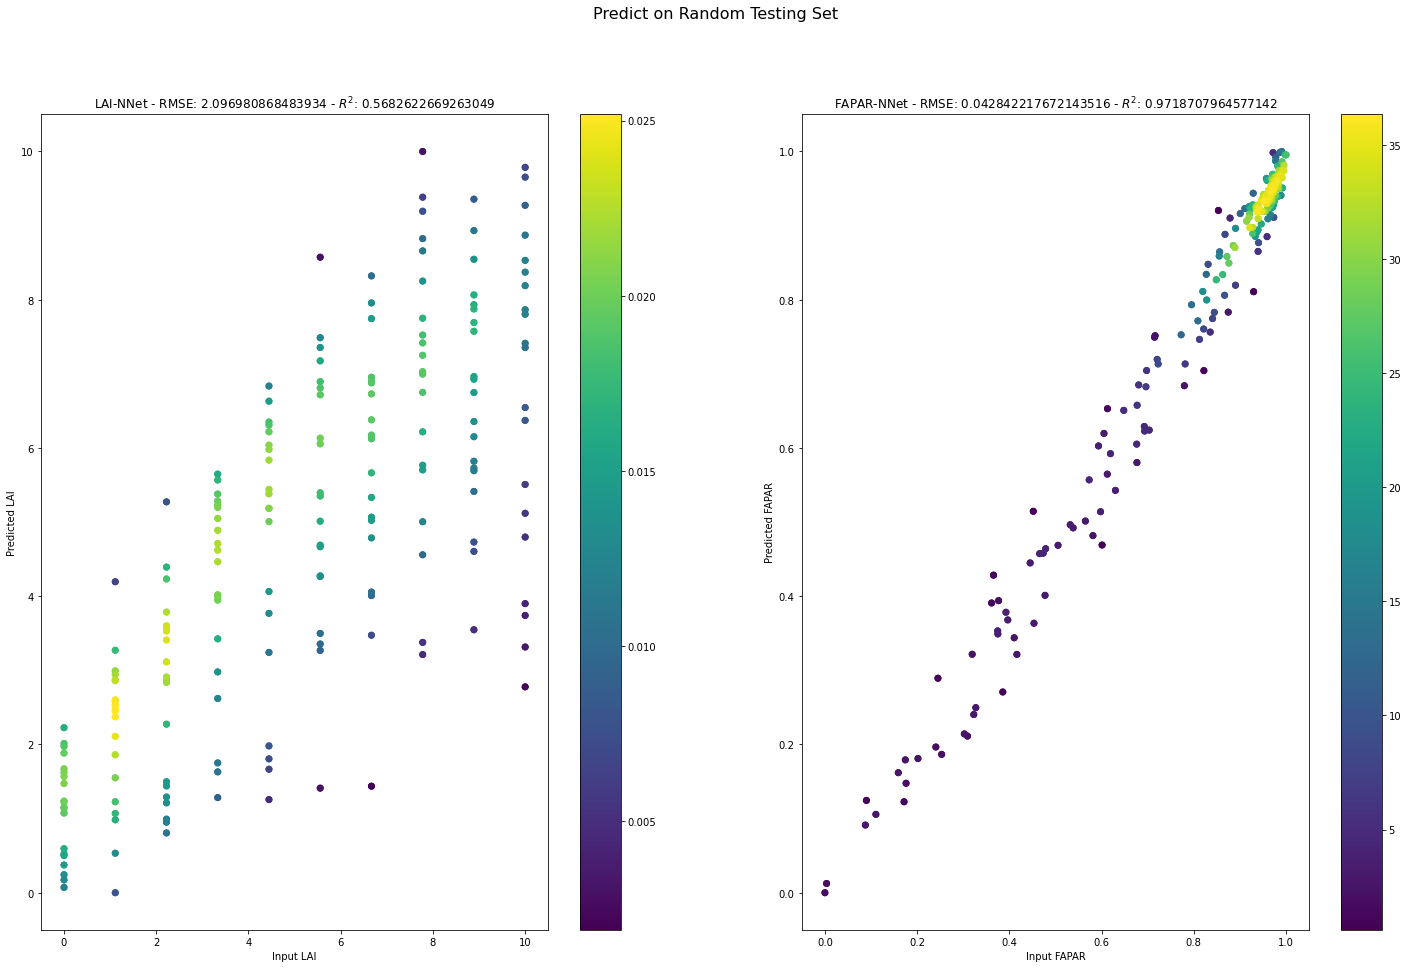

In [67]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(25,15))

plotting_function('LAI', LAI_test, LAI_predictions, 'LAI','Input LAI','Predicted LAI','NNet', ax1)

plotting_function('FAPAR', FAPAR_test, FAPAR_predictions, 'FAPAR','Input FAPAR','Predicted FAPAR','NNet', ax2)
  
fig.suptitle('Predict on Random Testing Set', fontsize=16)

In [73]:
# The following function exports the keras model in a way that can be parsed into a feature collection in Earth Engine and applied
# to images manually
def export_nnet(keras_model, X):
    nnet_data = []
    headers = []
    prev_layer_size = len(X.keys())
    layer_num = 0
    
    for layer in keras_model.layers:
        layer_info = layer.get_config()
        num_nodes = layer_info["units"]
        activation_function = layer_info["activation"]
        layer_weights = layer.get_weights()[0]
        layer_bias = layer.get_weights()[1]
        
        headers = list(set(headers) | set([x for x in range((prev_layer_size+1)*num_nodes)]))
        
        layer_data = [0, 0, layer_num, prev_layer_size, num_nodes, activation_function] + layer_weights.flatten().tolist() + layer_bias.tolist()
        nnet_data.append(layer_data)
        
        prev_layer_size = num_nodes
        layer_num += 1
    
    nnet_data.insert(0, ["latitude", "longitude", "layer_num", "prev_layer_size", "num_nodes", "activation"]+headers)
    return nnet_data

In [74]:
import csv

In [75]:
# Writing the neural network to a CSV file to be uploaded to the server side on Google Earth Engine
export_data = export_nnet(LAI_model, training_data)
with open('nnet.csv', 'w', newline='') as csvfile:
    nnet_writer = csv.writer(csvfile)
    for layerdata in export_data:
        nnet_writer.writerow(layerdata)